In [1]:
import numpy as np
import pandas as pd

In [2]:
datasetproduct_url = "D:/KULIAH/SEMESTER 6/TID046301 Data Analytics and Visualization/final-project/data-collection-preprocessing/data-produk/clean_product-goodgamingshop.csv"
datasetreview_url = "D:/KULIAH/SEMESTER 6/TID046301 Data Analytics and Visualization/final-project/data-collection-preprocessing/data-ulasan-clean/clean_data-ulasan-goodgamingstore.csv"

In [3]:
dfori_product = pd.read_csv(datasetproduct_url)
dfori_review = pd.read_csv(datasetreview_url)

In [4]:
df_product = dfori_product.copy()
df_review = dfori_review.copy()

In [5]:
df_review.head()

,id_produk,nama_produk,review,id_user,nama_akun,rating_user,ulasan_produk,waktu_review,varian_produk
0,PI2563,Pulsar X2 MINI RandomFrankP Edition WIreless G...,1,UI0001,Bimo,5,Nyaman dan praktis tinggal plug and play,Lebih dari 1 tahun lalu,none
1,PI2564,Melgeek Mojo68 Retro - Mechanical Keyboard,1,UI0002,S***m,5,"Keren memang mojo68 retro, sayang typing sound...",9 bulan lalu,Varian: Gat Silver Pro
2,PI2567,Redragon K608 Full size Mechanical - Gaming Ke...,1,UI0003,Riski,5,"buat yg nyari suara pas ngetik, bisa beli yg s...",Lebih dari 1 tahun lalu,Varian: Brown Switch
3,PI2569,CORSAIR MM300 EXTENDED GAMING MOUSEPAD SPEED,1,UI0004,S***o,5,"rapih, material bagus, nyaman digunakan, dimen...",Lebih dari 1 tahun lalu,none
4,PI2573,ZOOM75 Essential Edition Strawberry IceCream B...,1,UI0005,Winardi,5,Kedua kali beli Zoom75 disini and never dissap...,3 bulan lalu,none


In [6]:
df_review.dtypes

id_produk        object
nama_produk      object
review            int64
id_user          object
nama_akun        object
rating_user       int64
ulasan_produk    object
waktu_review     object
varian_produk    object
dtype: object

In [7]:
df_review = df_review.drop('review', axis=1)

In [8]:
# Mengonversi setiap nilai dalam kolom menjadi string
df_review['id_produk'] = df_review['id_produk'].apply(str)
df_review['nama_produk'] = df_review['nama_produk'].apply(str)
df_review['id_user'] = df_review['id_user'].apply(str)
df_review['nama_akun'] = df_review['nama_akun'].apply(str)
df_review['rating_user'] = df_review['rating_user'].apply(int)
df_review['ulasan_produk'] = df_review['ulasan_produk'].apply(str)
df_review['waktu_review'] = df_review['waktu_review'].apply(str)
df_review['varian_produk'] = df_review['varian_produk'].apply(str)

In [9]:
df_review.dtypes

id_produk        object
nama_produk      object
id_user          object
nama_akun        object
rating_user       int64
ulasan_produk    object
waktu_review     object
varian_produk    object
dtype: object

In [10]:
df_review.isnull().sum()

id_produk        0
nama_produk      0
id_user          0
nama_akun        0
rating_user      0
ulasan_produk    0
waktu_review     0
varian_produk    0
dtype: int64

In [11]:
df_product.dtypes

id_produk           object
nama_produk         object
kategori_produk     object
jumlah_terjual       int64
harga_jual           int64
harga_awal           int64
diskon             float64
deskripsi           object
rating             float64
rating_counter       int64
link                object
image_path          object
dtype: object

In [12]:
df_product['kategori_produk'].head(3)

0    Home|Komputer & Laptop|Aksesoris PC Gaming|Gam...
1    Home|Komputer & Laptop|Aksesoris PC Gaming|Gam...
2    Home|Komputer & Laptop|Aksesoris Komputer & La...
Name: kategori_produk, dtype: object

In [13]:
new_cat = df_product['kategori_produk'].str.split('|', expand=True)
new_cat

,0,1,2,3
0,Home,Komputer & Laptop,Aksesoris PC Gaming,Game Capture Card & Stream Deck
1,Home,Komputer & Laptop,Aksesoris PC Gaming,Game Capture Card & Stream Deck
2,Home,Komputer & Laptop,Aksesoris Komputer & Laptop,Keyboard
3,Home,Komputer & Laptop,Aksesoris Komputer & Laptop,Keypad
4,Home,Perlengkapan Pesta,Bungkus Kemasan,Bubble Wrap
...,...,...,...,...
2608,Home,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming
2609,Home,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming
2610,Home,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming
2611,Home,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming


In [14]:
new_cat['category_1'] = new_cat[1]
new_cat['category_2'] = new_cat[2]
new_cat['category_3'] = new_cat[3]

In [15]:
df_product.drop('kategori_produk', axis=1, inplace=True)
df_product['kategori_1'] = new_cat['category_1']
df_product['kategori_2'] = new_cat['category_2']
df_product['kategori_3'] = new_cat['category_3']

In [16]:
df_product['kategori_1'].value_counts()

kategori_1
Komputer & Laptop                                                                 2401
Audio, Kamera & Elektronik Lainnya                                                  81
Film & Musik                                                                        42
Gaming                                                                              33
Handphone & Tablet                                                                  13
Pertukangan                                                                          9
Rumah Tangga                                                                         8
Elektronik                                                                           6
Perlengkapan Pesta                                                                   4
Olahraga                                                                             4
Fashion Pria                                                                         4
Mainan & Hobi                   

In [17]:
df_product['kategori_1'] = df_product['kategori_1'].replace({
    'BenQ EW3270U 4K Video Enjoyment Monitor with Eye-care Technology 32" - EW3270U': 'Komputer & Laptop',
    'LG 27GK750F - Gaming Monitor': 'Komputer & Laptop',
    'MSi Optix MAG341CQ - Gaming Monitor': 'Komputer & Laptop'
})

In [18]:
df_product['kategori_1'].value_counts()

kategori_1
Komputer & Laptop                     2404
Audio, Kamera & Elektronik Lainnya      81
Film & Musik                            42
Gaming                                  33
Handphone & Tablet                      13
Pertukangan                              9
Rumah Tangga                             8
Elektronik                               6
Perlengkapan Pesta                       4
Olahraga                                 4
Fashion Pria                             4
Mainan & Hobi                            3
Office & Stationery                      1
Dapur                                    1
Name: count, dtype: int64

In [19]:
df_product['kategori_2'].value_counts()

kategori_2
Aksesoris PC Gaming                                                               1881
Aksesoris Komputer & Laptop                                                        295
Monitor                                                                            157
Audio                                                                               74
Vokal                                                                               37
Komponen Komputer                                                                   24
Kabel & Adaptor                                                                     21
Aksesoris Mobile Gaming                                                             20
PC & Laptop Gaming                                                                  13
Aksesoris Handphone                                                                 12
Furniture                                                                            8
Aksesoris Game Console          

In [20]:
mapping_kategori = {
    'MSi Optix MAG341CQ - Gaming Monitor': 'Monitor',
    'LG 27GK750F - Gaming Monitor': 'Monitor',
    'BenQ EW3270U 4K Video Enjoyment Monitor with Eye-care Technology 32" - EW3270U': 'Monitor'
}

df_product['kategori_2'] = df_product['kategori_2'].map(mapping_kategori).fillna(df_product['kategori_2'])

In [21]:
df_product['kategori_2'].value_counts()

kategori_2
Aksesoris PC Gaming             1881
Aksesoris Komputer & Laptop      295
Monitor                          160
Audio                             74
Vokal                             37
Komponen Komputer                 24
Kabel & Adaptor                   21
Aksesoris Mobile Gaming           20
PC & Laptop Gaming                13
Aksesoris Handphone               12
Furniture                          8
Aksesoris Game Console             6
Game Console                       6
TV & Aksesoris                     6
Hand Tools                         5
Keyboard & Piano                   4
Atasan Pria                        4
Networking                         4
Bungkus Kemasan                    4
Lighting & Studio                  4
Aksesoris Olahraga                 3
Media Penyimpanan Data             3
Proyektor & Aksesoris              2
Material Bangunan                  2
Document Organizer                 1
Bekal                              1
Aksesoris Kamera           

In [22]:
df_product['kategori_3'].value_counts()

kategori_3
Keyboard Gaming                    462
Mouse Gaming                       336
Headset Gaming                     333
Game Capture Card & Stream Deck    247
Kursi Gaming                       192
                                  ... 
Microphone Kamera                    1
SSD                                  1
Holder Handphone                     1
CD PC dan Laptop Gaming              1
Action Figure                        1
Name: count, Length: 99, dtype: int64

In [23]:
produk_ke_kategori = {
    'LG 27GK750F - Gaming Monitor': 'Gaming Monitor',
    'MSi Optix MAG341CQ - Gaming Monitor': 'Gaming Monitor',
    'BenQ EW3270U 4K Video Enjoyment Monitor with Eye-care Technology 32" - EW3270U': 'Monitor'
}

df_product['kategori_2'] = df_product['kategori_2'].map(produk_ke_kategori).fillna(df_product['kategori_2'])

In [24]:
df_product['kategori_3'].value_counts()

kategori_3
Keyboard Gaming                    462
Mouse Gaming                       336
Headset Gaming                     333
Game Capture Card & Stream Deck    247
Kursi Gaming                       192
                                  ... 
Microphone Kamera                    1
SSD                                  1
Holder Handphone                     1
CD PC dan Laptop Gaming              1
Action Figure                        1
Name: count, Length: 99, dtype: int64

In [25]:
df_product.isna().sum()

id_produk         0
nama_produk       0
jumlah_terjual    0
harga_jual        0
harga_awal        0
diskon            0
deskripsi         0
rating            0
rating_counter    0
link              0
image_path        0
kategori_1        0
kategori_2        0
kategori_3        0
dtype: int64

In [26]:
df_product.sample(5)

,id_produk,nama_produk,jumlah_terjual,harga_jual,harga_awal,diskon,deskripsi,rating,rating_counter,link,image_path,kategori_1,kategori_2,kategori_3
1941,PI1942,MSI Pro MP241x 23.8” Eye Care 75Hz Full HD 108...,0,2049000,2049000,0.0,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,0.0,0,https://www.tokopedia.com/goodgamingshop/msi-p...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Monitor,Monitor LED
2363,PI2364,Rexus Kvlar T7 Speed Edition L - Gaming Mousepad,60,49000,49000,0.0,JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 - ...,5.0,37,https://www.tokopedia.com/goodgamingshop/rexus...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Mouse Pad Gaming
2427,PI2428,DrunkDeer A75 Pro / A 75 Pro / A75Pro Wired Ac...,21,2999000,2999000,0.0,✅ JAM OPERASIONAL\r\n✅ Senin - Minggu : 10:00 ...,4.9,10,https://www.tokopedia.com/goodgamingshop/drunk...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming
22,PI0023,JWICK ULTIMATE BLACK V2 KEYBOARD SWITCH,500,3750,3750,0.0,JAM OPERASIONAL\r\nSenin - Minggu : 10:00 - 19...,4.9,19,https://www.tokopedia.com/goodgamingshop/jwick...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Game Capture Card & Stream Deck
2200,PI2201,Genius Ammox X1-400 - Gaming Mouse,0,283000,283000,0.0,Specification\r\nSystem requirements\r\n\r\nCP...,0.0,0,https://www.tokopedia.com/goodgamingshop/geniu...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming


In [27]:
# Filter produk dengan rating 0 tetapi rating_counter tidak nol
reviews_zero_rating = df_product[(df_product['rating'] == 0) & (df_product['rating_counter'] != 0)]

# Tampilkan dalam bentuk tabel
print(reviews_zero_rating)

     id_produk                                        nama_produk  \
187     PI0188                    Digital Alliance MyCam - Webcam   
197     PI0198  Keychron Q1 QMK BAREBONE - DIY KIT Gaming Keyb...   
267     PI0268                    dbE C100 Full HD 1080P - Webcam   
515     PI0516  Leopold FC660M Yellow Blue White Mechanical Ga...   
612     PI0613    Digital Alliance Delta Armor X - Gaming Headset   
674     PI0675      Premium Garskin G403 Skin Mouse - Supreme R&W   
748     PI0749      GALAX Gaming Chair GC-01 - RGB Effect - Hitam   
1078    PI1079                         Elgato Wave Extension Rods   
2439    PI2440       Corsair MM200 Pro Heavy XL - Gaming Mousepad   

      jumlah_terjual  harga_jual  harga_awal  diskon  \
187               70      299000      299000    0.00   
197               60     2900000     2900000    0.00   
267               40      375000      375000    0.00   
515               17     1045000     1480000    0.29   
612               13      499

In [28]:
rows_to_show = ['PI0188', 'PI0198', 'PI0268', 'PI0516', 'PI0613', 'PI0675', 'PI0749', 'PI1079', 'PI2440']

# Filter baris berdasarkan ID produk yang disebutkan dan pilih hanya kolom 'link'
df_product.loc[df_product['id_produk'].isin(rows_to_show)]

,id_produk,nama_produk,jumlah_terjual,harga_jual,harga_awal,diskon,deskripsi,rating,rating_counter,link,image_path,kategori_1,kategori_2,kategori_3
187,PI0188,Digital Alliance MyCam - Webcam,70,299000,299000,0.00,Deskripsi Digital Alliance MyCam - Webcam\r\nW...,0.0,44,https://www.tokopedia.com/goodgamingshop/digit...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris Komputer & Laptop,Webcam
197,PI0198,Keychron Q1 QMK BAREBONE - DIY KIT Gaming Keyb...,60,2900000,2900000,0.00,Garansi Resmi Distributor (WAJIB MENYERTAKAN B...,0.0,48,https://www.tokopedia.com/goodgamingshop/keych...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming
267,PI0268,dbE C100 Full HD 1080P - Webcam,40,375000,375000,0.00,Fitur Utama :\r\n- Gambar jernih dengan kualit...,0.0,23,https://www.tokopedia.com/goodgamingshop/dbe-c...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris Komputer & Laptop,Webcam
515,PI0516,Leopold FC660M Yellow Blue White Mechanical Ga...,17,1045000,1480000,0.29,Garansi Resmi Distributor Terkait 1 Tahun\r\n\...,0.0,12,https://www.tokopedia.com/goodgamingshop/leopo...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming
612,PI0613,Digital Alliance Delta Armor X - Gaming Headset,13,499000,499000,0.00,Deskripsi Digital Alliance Delta Armor X - Gam...,0.0,6,https://www.tokopedia.com/goodgamingshop/digit...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Headset Gaming
674,PI0675,Premium Garskin G403 Skin Mouse - Supreme R&W,11,49999,49999,0.00,Pastikan Anda Sudah Memilih Variant Motif Yang...,0.0,7,https://www.tokopedia.com/goodgamingshop/premi...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris Komputer & Laptop,Lainnya
748,PI0749,GALAX Gaming Chair GC-01 - RGB Effect - Hitam,9,3532000,3532000,0.00,Angle : 90-180degree\r\nBack Width 53 cm\r\nSe...,0.0,7,https://www.tokopedia.com/goodgamingshop/galax...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Kursi Gaming
1078,PI1079,Elgato Wave Extension Rods,4,200000,200000,0.00,Deskripsi Elgato Wave Extension Rods\r\n\r\nVA...,0.0,3,https://www.tokopedia.com/goodgamingshop/elgat...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris Komputer & Laptop,Lainnya
2439,PI2440,Corsair MM200 Pro Heavy XL - Gaming Mousepad,19,419000,419000,0.00,Game in confidence on the CORSAIR MM200 PRO Pr...,0.0,12,https://www.tokopedia.com/goodgamingshop/corsa...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Mouse Pad Gaming


In [29]:
df_product.loc[df_product['id_produk'] == 'PI0188', 'rating'] = 4.9
df_product.loc[df_product['id_produk'] == 'PI0198', 'rating'] = 5.0
df_product.loc[df_product['id_produk'] == 'PI0268', 'rating'] = 4.9
df_product.loc[df_product['id_produk'] == 'PI0516', 'rating'] = 4.9
df_product.loc[df_product['id_produk'] == 'PI0613', 'rating'] = 4.3
df_product.loc[df_product['id_produk'] == 'PI0675', 'rating'] = 4.1
df_product.loc[df_product['id_produk'] == 'PI0749', 'rating'] = 4.7
df_product.loc[df_product['id_produk'] == 'PI1079', 'rating'] = 4.3
df_product.loc[df_product['id_produk'] == 'PI2440', 'rating'] = 4.9

EDA

In [30]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_theme(style='darkgrid')
sns.set_palette("deep")
mpl.rcParams['font.family'] = 'sans'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

In [31]:
df_product.describe(include='object')

,id_produk,nama_produk,deskripsi,link,image_path,kategori_1,kategori_2,kategori_3
count,2613,2613,2613,2613,2613,2613,2613,2613
unique,2613,2613,2562,2613,2613,14,39,99
top,PI0001,"AKKO CS SWITCH MECHANICAL KEYBOARD - ROSE RED,...",#ERROR!,https://www.tokopedia.com/goodgamingshop/akko-...,final-project\data-collection-preprocessing\da...,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming
freq,1,1,7,1,1,2404,1881,462


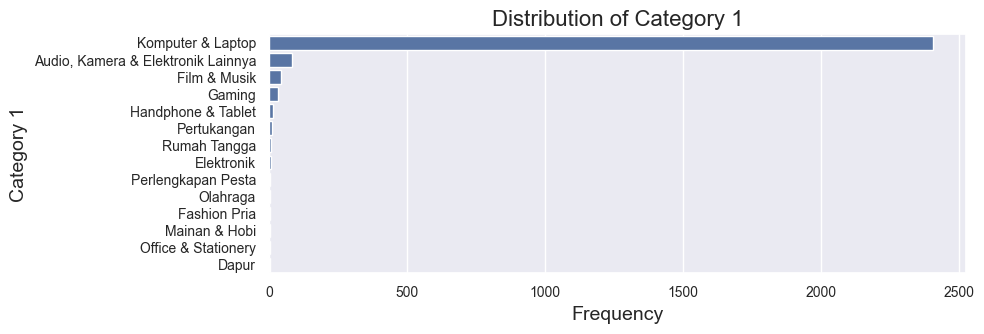

In [32]:
plt.figure(figsize=(10, 3.5))
sns.countplot(data=df_product, y='kategori_1', order=df_product['kategori_1'].value_counts().index)
plt.title('Distribution of Category 1')
plt.xlabel('Frequency')
plt.ylabel('Category 1')
plt.tight_layout()
plt.show()

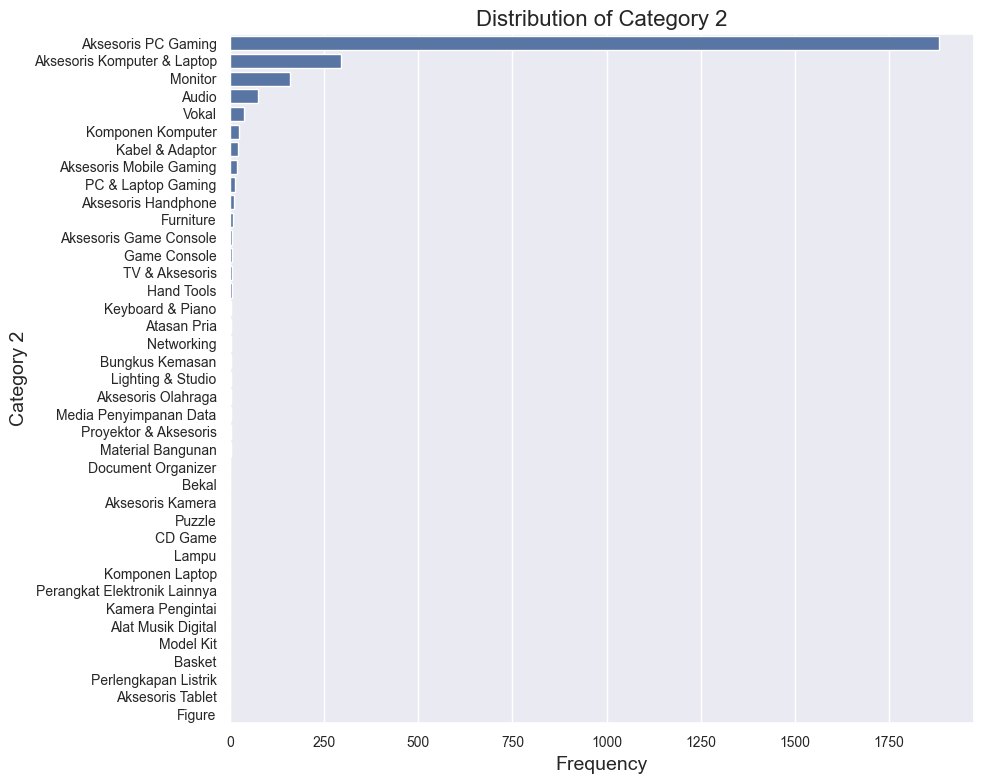

In [33]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_product, y='kategori_2', order=df_product['kategori_2'].value_counts().index)
plt.title('Distribution of Category 2')
plt.xlabel('Frequency')
plt.ylabel('Category 2')
plt.tight_layout()
plt.show()

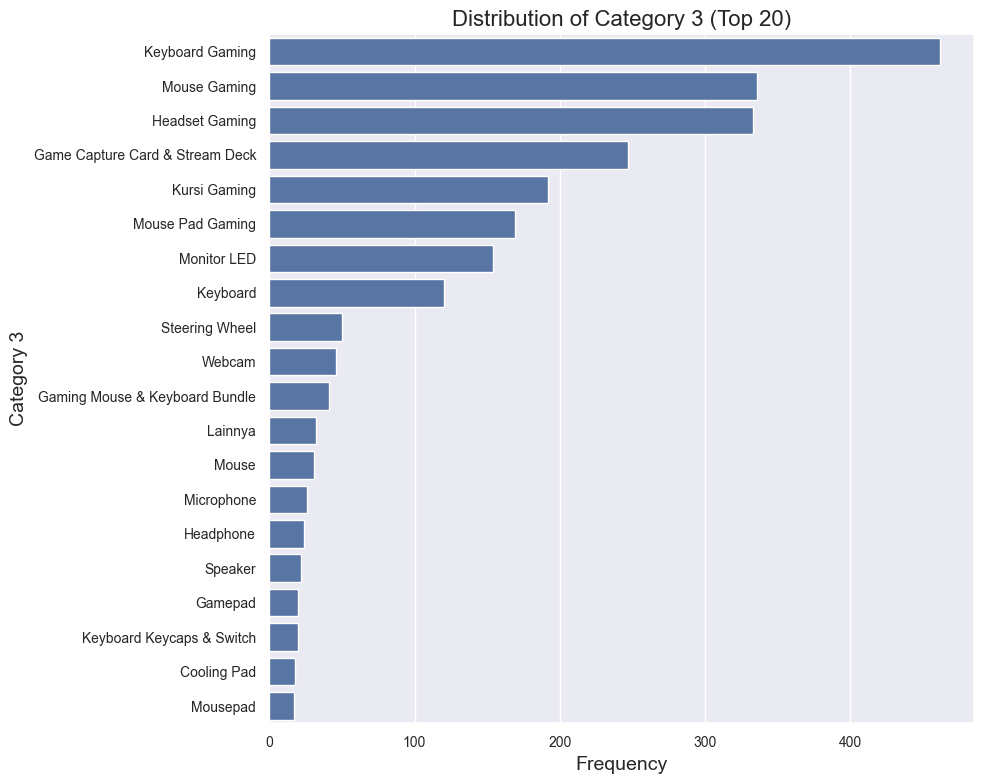

In [34]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_product, y='kategori_3', order=df_product['kategori_3'].value_counts().head(20).index)
plt.title('Distribution of Category 3 (Top 20)')
plt.xlabel('Frequency')
plt.ylabel('Category 3')
plt.tight_layout()
plt.show()


In [35]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_produk       2613 non-null   object 
 1   nama_produk     2613 non-null   object 
 2   jumlah_terjual  2613 non-null   int64  
 3   harga_jual      2613 non-null   int64  
 4   harga_awal      2613 non-null   int64  
 5   diskon          2613 non-null   float64
 6   deskripsi       2613 non-null   object 
 7   rating          2613 non-null   float64
 8   rating_counter  2613 non-null   int64  
 9   link            2613 non-null   object 
 10  image_path      2613 non-null   object 
 11  kategori_1      2613 non-null   object 
 12  kategori_2      2613 non-null   object 
 13  kategori_3      2613 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 285.9+ KB


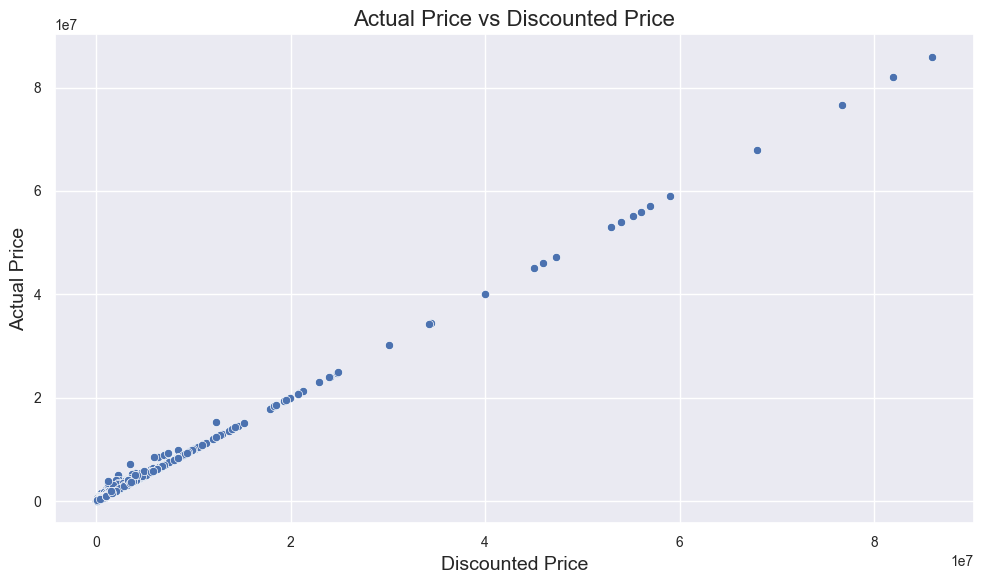

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_product, x='harga_jual', y='harga_awal')
plt.title('Actual Price vs Discounted Price')
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.tight_layout()
plt.show()

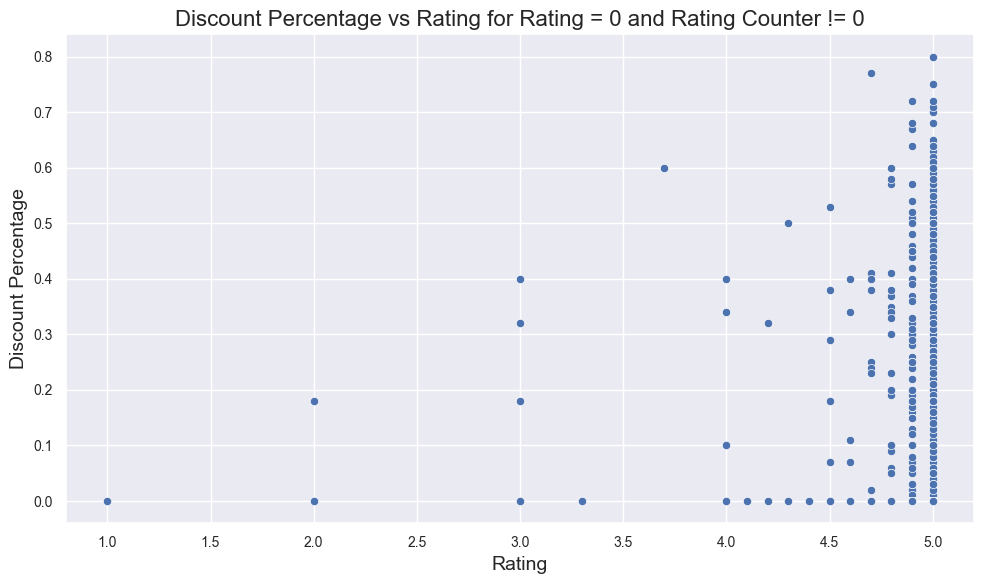

In [37]:
# Filter the data
filtered_df = df_product[(df_product['rating'] >= 0) & (df_product['rating_counter'] != 0)]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='rating', y='diskon')
plt.title('Discount Percentage vs Rating for Rating = 0 and Rating Counter != 0')
plt.xlabel('Rating')
plt.ylabel('Discount Percentage')
plt.tight_layout()
plt.show()

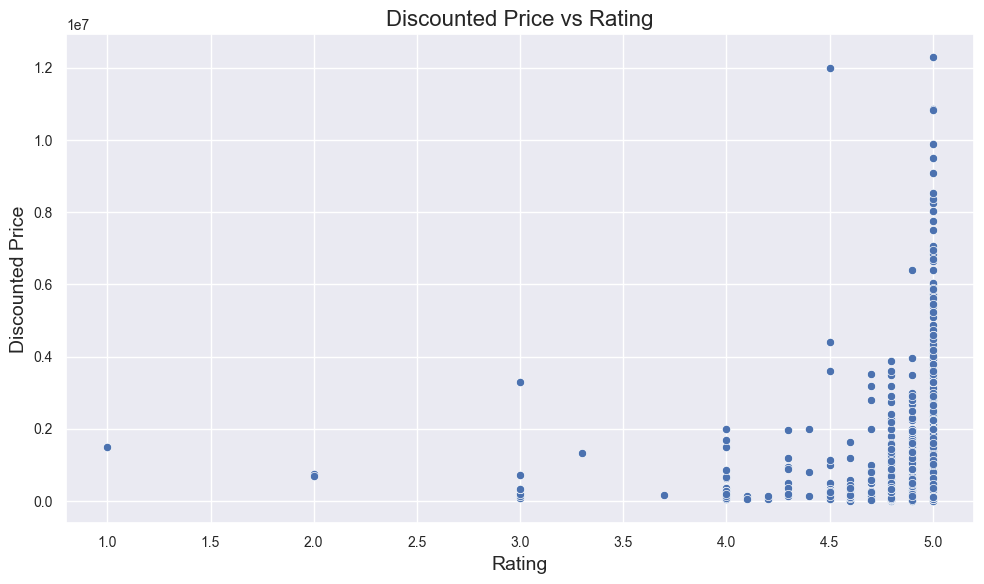

In [38]:
# Filter the data
filtered_df = df_product[(df_product['rating'] >= 0) & (df_product['rating_counter'] != 0)]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='rating', y='harga_jual')
plt.title('Discounted Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Discounted Price')
plt.tight_layout()
plt.show()

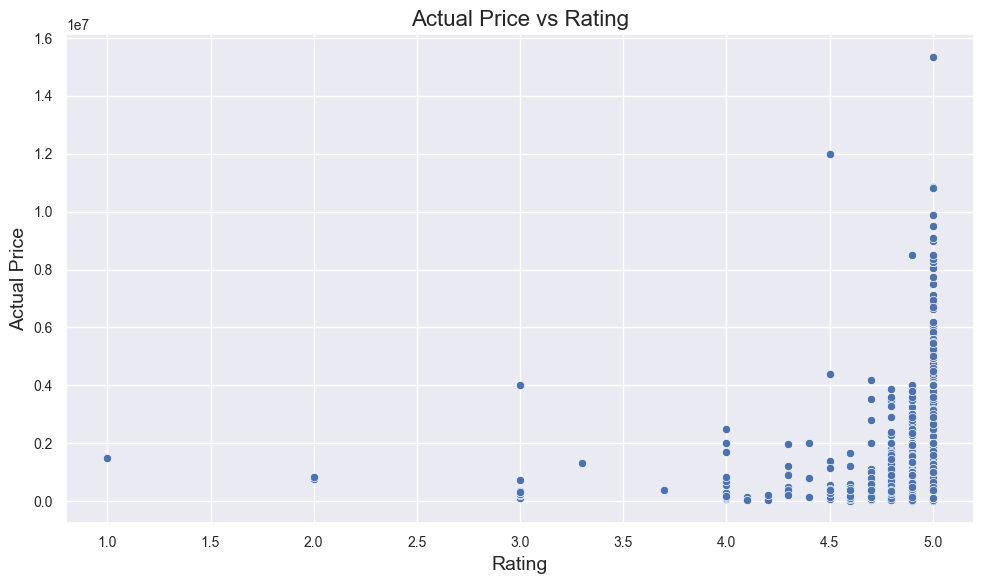

In [39]:
# Filter the data
filtered_df = df_product[(df_product['rating'] >= 0) & (df_product['rating_counter'] != 0)]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='rating', y='harga_awal')
plt.title('Actual Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Actual Price')
plt.tight_layout()
plt.show()

In [40]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_produk       2613 non-null   object 
 1   nama_produk     2613 non-null   object 
 2   jumlah_terjual  2613 non-null   int64  
 3   harga_jual      2613 non-null   int64  
 4   harga_awal      2613 non-null   int64  
 5   diskon          2613 non-null   float64
 6   deskripsi       2613 non-null   object 
 7   rating          2613 non-null   float64
 8   rating_counter  2613 non-null   int64  
 9   link            2613 non-null   object 
 10  image_path      2613 non-null   object 
 11  kategori_1      2613 non-null   object 
 12  kategori_2      2613 non-null   object 
 13  kategori_3      2613 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 285.9+ KB


In [41]:
import plotly.express as px

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(df_product, x='harga_awal', y='harga_jual', z='rating', color='rating',
                     hover_data=['nama_produk'], title='Interactive 3D Scatter Plot of Rating, Actual Price, and Discounted Price')
fig.show()

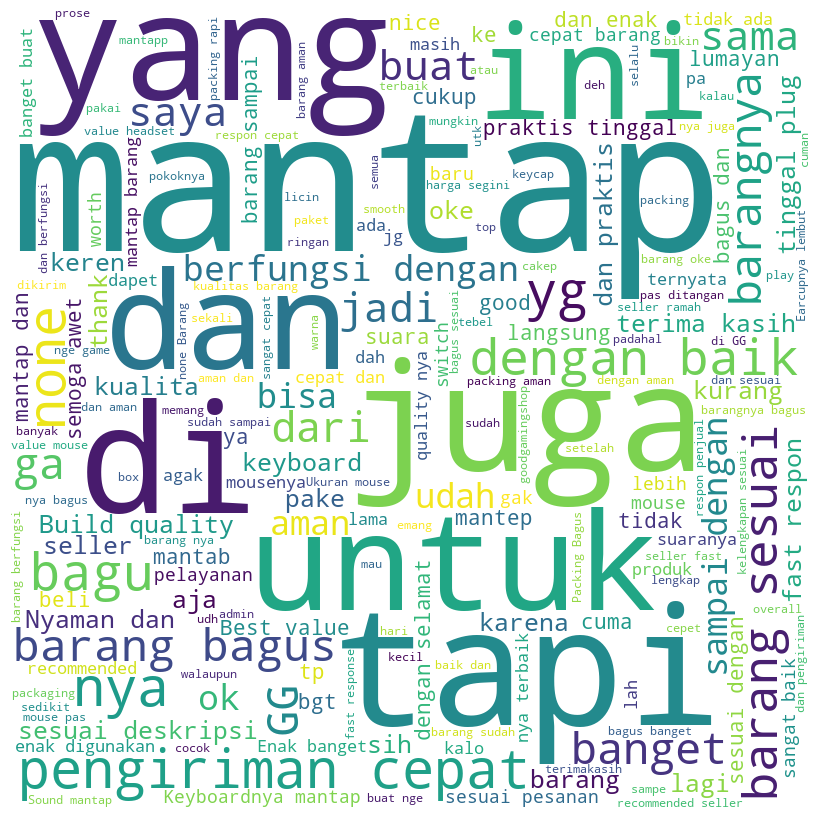

In [42]:
from wordcloud import WordCloud

product_text = ' '.join(df_review['ulasan_produk'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(product_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

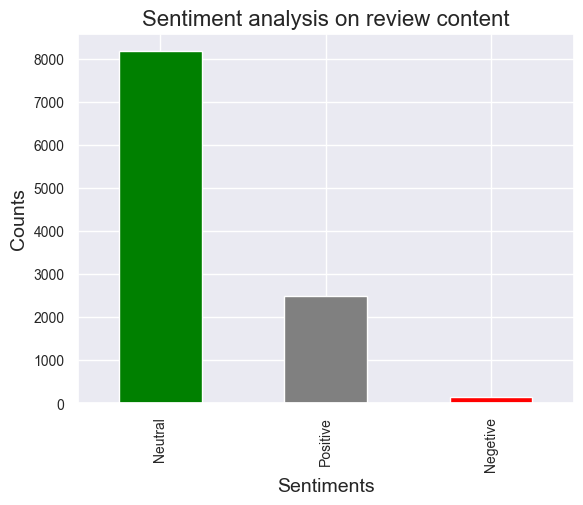

In [43]:
from textblob import TextBlob

# Classify Sentiment
def senti_als(text):
    analysis = TextBlob(text)
    # threshold for positive & negetive polarity
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negetive'
    else:
        return 'Neutral'


# apply sentiment analysis on review_content

sentimen = df_review['ulasan_produk'].apply(senti_als)
sentiment_count = sentimen.value_counts()

# plot the bar

sentiment_count.plot(kind='bar',color=['green','gray','red'],title="Sentiment analysis on review content")
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.show()

# Collaborative Filtering

In [ ]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic
import pandas as pd
import numpy as np

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_review[['id_user', 'id_produk', 'rating_user']], reader)

# Split dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build and train user-based collaborative filtering model
sim_options = {'name': 'cosine', 'user_based': True}  # User-based CF model meaning that the similarity is calculated between users
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Evaluate model
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

# Show cosine similarity values
similarity_matrix = model.sim  # similarity matrix
user_inner_ids = list(trainset.all_users())  # internal ids for all users

# Create a DataFrame to visualize the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=user_inner_ids, columns=user_inner_ids)

print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("Cosine Similarity Matrix:\n", similarity_df)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5244
MAE:  0.1962
Root Mean Squared Error:  0.524400089376388
Mean Absolute Error:  0.19624730102010127
Cosine Similarity Matrix:
           0     1     2     3         4         5         6     7     8     \
0     1.000000   0.0   1.0   1.0  0.998131  0.991457  0.998838   0.0   0.0   
1     0.000000   1.0   0.0   0.0  0.000000  0.000000  1.000000   0.0   0.0   
2     1.000000   0.0   1.0   1.0  1.000000  1.000000  1.000000   0.0   1.0   
3     1.000000   0.0   1.0   1.0  1.000000  1.000000  0.990552   0.0   0.0   
4     0.998131   0.0   1.0   1.0  1.000000  1.000000  1.000000   0.0   0.0   
...        ...   ...   ...   ...       ...       ...       ...   ...   ...   
3325  0.000000   0.0   0.0   0.0  0.000000  0.000000  1.000000   0.0   0.0   
3326  0.000000   0.0   0.0   0.0  0.000000  0.000000  1.000000   0.0   0.0   
3327  1.000000   0.0   0.0   0.0  0.000000  1.000000  1.000000   0.0   0.0   
3328 

In [ ]:
predictions[0:5]

[Prediction(uid='UI0203', iid='PI0060', r_ui=5.0, est=4.9, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='UI0318', iid='PI0031', r_ui=5.0, est=4.8178095168802875, details={'actual_k': 11, 'was_impossible': False}),
 Prediction(uid='UI1252', iid='PI0001', r_ui=5.0, est=4.886434601595929, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='UI0482', iid='PI2342', r_ui=5.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='UI3826', iid='PI0009', r_ui=5.0, est=4.886434601595929, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})]

In [ ]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, cross_validate
from surprise import KNNBasic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_review[['id_user', 'id_produk', 'rating_user']], reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build and train user-based collaborative filtering model
sim_options = {'name': 'cosine', 'user_based': True}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

# Show cosine similarity values
similarity_matrix = model.sim
user_inner_ids = list(trainset.all_users())

# Create a DataFrame to visualize the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=user_inner_ids, columns=user_inner_ids)

print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("Cosine Similarity Matrix:\n", similarity_df)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5244
MAE:  0.1962
Root Mean Squared Error:  0.524400089376388
Mean Absolute Error:  0.19624730102010127
Cosine Similarity Matrix:
           0     1     2     3         4         5         6     7     8     \
0     1.000000   0.0   1.0   1.0  0.998131  0.991457  0.998838   0.0   0.0   
1     0.000000   1.0   0.0   0.0  0.000000  0.000000  1.000000   0.0   0.0   
2     1.000000   0.0   1.0   1.0  1.000000  1.000000  1.000000   0.0   1.0   
3     1.000000   0.0   1.0   1.0  1.000000  1.000000  0.990552   0.0   0.0   
4     0.998131   0.0   1.0   1.0  1.000000  1.000000  1.000000   0.0   0.0   
...        ...   ...   ...   ...       ...       ...       ...   ...   ...   
3325  0.000000   0.0   0.0   0.0  0.000000  0.000000  1.000000   0.0   0.0   
3326  0.000000   0.0   0.0   0.0  0.000000  0.000000  1.000000   0.0   0.0   
3327  1.000000   0.0   0.0   0.0  0.000000  1.000000  1.000000   0.0   0.0   
3328 

In [ ]:
# Cross-validation to evaluate the model
cv_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(f"Cross-validation results: {cv_results}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5068  0.5038  0.5790  0.5292  0.5544  0.5346  0.0287  
MAE (testset)     0.1969  0.2035  0.2189  0.2026  0.2060  0.2056  0.0073  
Fit time          0.28    0.23    0.22    0.23    0.25    0.24    0.02    
Test time         0.05    0.05    0.05    0.05    0.05    0.05    0.00    
Cross-validation results: {'test_rmse': array([0.50677448, 0.50379251, 0.5790212 , 0.52923909, 0.55441776]), 'test_mae': array([0.19688946, 0.20352214, 0.21888023, 0.20260444, 0.20599182

In [ ]:
# Generate recommendations for a specific user
user_id = 'UI0088'  # Replace with a user ID from your dataset
user_inner_id = trainset.to_inner_uid(user_id)
user_neighbors = model.get_neighbors(user_inner_id, k=10)

# Convert inner ids to raw ids
user_neighbors_raw = [trainset.to_raw_uid(inner_id) for inner_id in user_neighbors]
print(f"Top 10 similar users to user {user_id}: {user_neighbors_raw}")

Top 10 similar users to user UI0088: ['UI2741', 'UI3521', 'UI2787', 'UI0108', 'UI0203', 'UI0341', 'UI0931', 'UI0208', 'UI3416', 'UI0101']


In [ ]:
# Predict ratings for a specific user and item
item_id = 'PI0102'  # Replace with an item ID from your dataset
pred = model.predict(user_id, item_id)
print(f"Predicted rating for user {user_id} on item {item_id}: {pred.est}")

Predicted rating for user UI0088 on item PI0102: 4.75


# Matrix Factorization

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_review[['id_user', 'id_produk', 'rating_user']], reader)

# Split dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train SVD model
algo = SVD()
algo.fit(trainset)

# Make predictions for test set
predictions = algo.test(testset)

# Evaluate predictions
accuracy.rmse(predictions)

# Print a few example predictions
for prediction in predictions[:5]:
    print('User:', prediction.uid)
    print('Item:', prediction.iid)
    print('Actual Rating:', prediction.r_ui)
    print('Predicted Rating:', prediction.est)
    print()

RMSE: 0.4607
User: UI2537
Item: PI0059
Actual Rating: 5.0
Predicted Rating: 4.847799164586702

User: UI0080
Item: PI2317
Actual Rating: 5.0
Predicted Rating: 5

User: UI0127
Item: PI0274
Actual Rating: 5.0
Predicted Rating: 4.752364561160931

User: UI0685
Item: PI2359
Actual Rating: 5.0
Predicted Rating: 4.687473655584374

User: UI2516
Item: PI0058
Actual Rating: 5.0
Predicted Rating: 4.957516437321047



In [ ]:
# Run cross-validation to evaluate the model
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print results
print("Mean RMSE:", results['test_rmse'].mean())
print("Mean MAE:", results['test_mae'].mean())

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5081  0.4648  0.4916  0.4983  0.4882  0.4902  0.0144  
MAE (testset)     0.2096  0.2008  0.2119  0.2066  0.2054  0.2069  0.0038  
Fit time          0.13    0.13    0.12    0.12    0.13    0.12    0.00    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Mean RMSE: 0.4901877559877457
Mean MAE: 0.20687416944328


In [ ]:
from surprise import SVD
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_review[['id_user', 'id_produk', 'rating_user']], reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train SVD model
algo = SVD()
algo.fit(trainset)

# Make predictions for the test set
predictions = algo.test(testset)

# Evaluate predictions
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

# Print RMSE and MAE
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

# Print a few example predictions
for prediction in predictions[:5]:
    print(f'User: {prediction.uid}, Item: {prediction.iid}, Actual Rating: {prediction.r_ui}, Predicted Rating: {prediction.est}')
    print()

RMSE: 0.4791
MAE:  0.2001
Root Mean Squared Error: 0.4791090084915684
Mean Absolute Error: 0.20007709086527398
User: UI0203, Item: PI0060, Actual Rating: 5.0, Predicted Rating: 4.940788977283954

User: UI0318, Item: PI0031, Actual Rating: 5.0, Predicted Rating: 4.778708005717726

User: UI1252, Item: PI0001, Actual Rating: 5.0, Predicted Rating: 4.856577756037421

User: UI0482, Item: PI2342, Actual Rating: 5.0, Predicted Rating: 4.710245768687152

User: UI3826, Item: PI0009, Actual Rating: 5.0, Predicted Rating: 4.840546538309105



In [ ]:
# Cross-validation to evaluate the model
cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(f"Cross-validation results: {cv_results}")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.4696  0.4684  0.5333  0.4647  0.5064  0.4885  0.0270  
MAE (testset)     0.1958  0.2033  0.2180  0.2038  0.2141  0.2070  0.0080  
Fit time          0.12    0.16    0.12    0.12    0.12    0.13    0.02    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Cross-validation results: {'test_rmse': array([0.4696158 , 0.4683895 , 0.53328148, 0.46465477, 0.50642418]), 'test_mae': array([0.19581443, 0.20328482, 0.21796354, 0.20376985, 0.21408116]), 'fit_time': (0.12082171440124512, 0.15967583656311035, 0.12440776824951172, 0.1188962459564209, 0.11871719360351562), 'test_time': (0.010964632034301758, 0.008396625518798828, 0.007010221481323242, 0.010562896728515625, 0.0067937374114990234)}


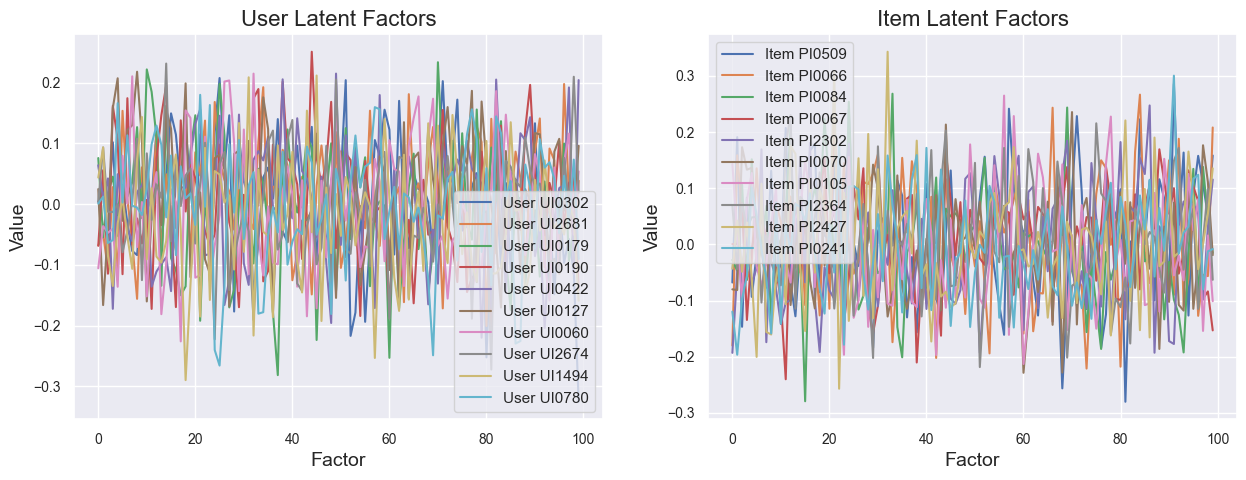

In [ ]:
# Extract user and item factors
user_factors = algo.pu
item_factors = algo.qi

# Visualize the user and item latent factors for the first few users and items
n_factors = user_factors.shape[1]
n_users_plot = 10
n_items_plot = 10

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot user factors
for i in range(n_users_plot):
    axs[0].plot(np.arange(n_factors), user_factors[i], label=f'User {trainset.to_raw_uid(i)}')
axs[0].set_title('User Latent Factors')
axs[0].set_xlabel('Factor')
axs[0].set_ylabel('Value')
axs[0].legend()

# Plot item factors
for i in range(n_items_plot):
    axs[1].plot(np.arange(n_factors), item_factors[i], label=f'Item {trainset.to_raw_iid(i)}')
axs[1].set_title('Item Latent Factors')
axs[1].set_xlabel('Factor')
axs[1].set_ylabel('Value')
axs[1].legend()

plt.show()